In [1]:
from demo import detect_face
import time
import caffe
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
caffe_model_path = "./model"
caffe.set_mode_cpu()
PNet = caffe.Net(caffe_model_path+"/det1.prototxt", caffe_model_path+"/det1.caffemodel", caffe.TEST)
RNet = caffe.Net(caffe_model_path+"/det2.prototxt", caffe_model_path+"/det2.caffemodel", caffe.TEST)
ONet = caffe.Net(caffe_model_path+"/det3.prototxt", caffe_model_path+"/det3.caffemodel", caffe.TEST)

In [3]:
def drawBoxes(im, boxes, points):
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    for i in range(x1.shape[0]):
        cv2.rectangle(im, (int(x1[i]), int(y1[i])), (int(x2[i]), int(y2[i])), (0,255,0), 1)
    for p in points:
        for i in range(5):
            cv2.circle(im, (p[i], p[i + 5]), 1, (0, 0, 255), 2)
    return im

In [65]:
imgpath = "./mytest2.png"
img = cv2.imread(imgpath)
img_matlab = img.copy()
tmp = img_matlab[:,:,2].copy()
img_matlab[:,:,2] = img_matlab[:,:,0]
img_matlab[:,:,0] = tmp

In [66]:
threshold = [0.6, 0.7, 0.7]
factor = 0.709

In [67]:
def vis(img, scales):
    for scale in scales:
        copy = img.copy()
        st = time.time()
        boundingboxes, points = detect_face(img_matlab, scale, PNet, RNet, ONet, threshold, False, factor)
        fin = time.time() - st
        print 'SCALE', scale, '\t time', fin
        copy = drawBoxes(copy, boundingboxes, points)
        plt.figure(figsize=(8,6))
        plt.title('SCALE ' + str(scale))
        plt.imshow(copy)

SCALE 20 	 time 1.78721380234
SCALE 30 	 time 0.896519184113
SCALE 40 	 time 0.51025891304
SCALE 60 	 time 0.263141870499


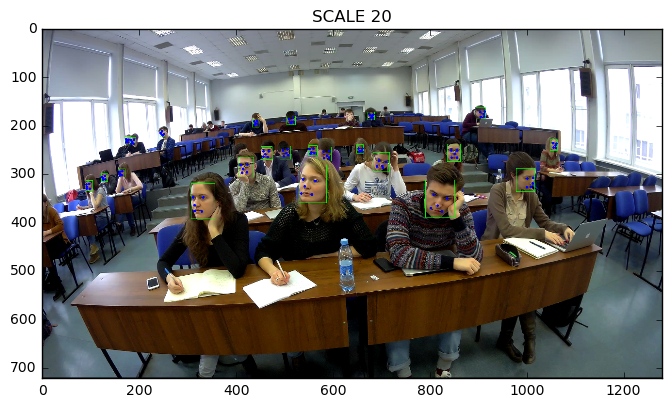

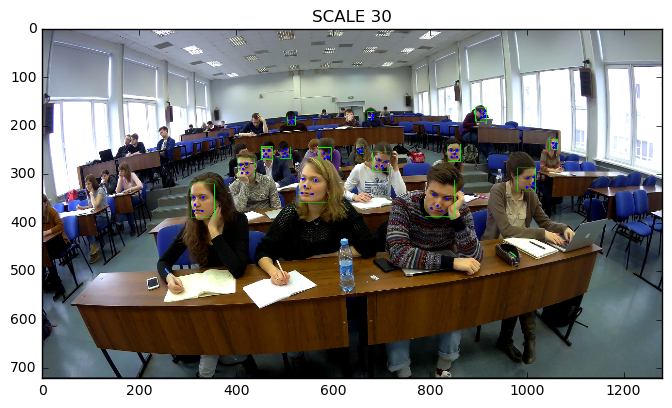

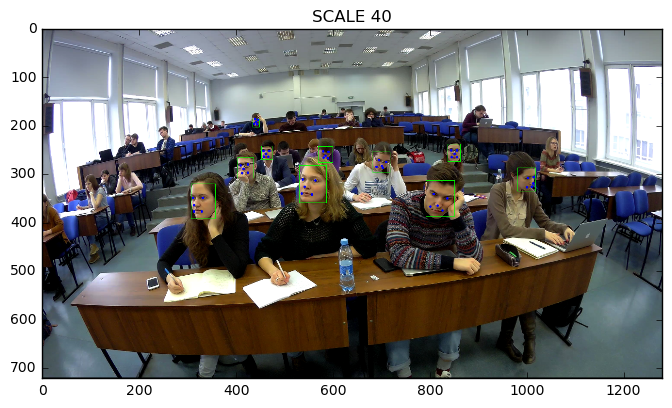

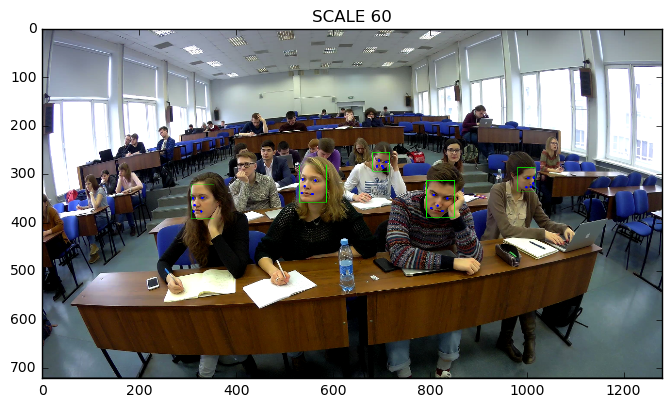

In [70]:
minscale = 20 # default scale
scales = [20, 30, 40, 60]
vis(img_matlab, scales)

SCALE 23 	 time 1.42677307129
SCALE 25 	 time 1.28301095963
SCALE 28 	 time 0.961390972137


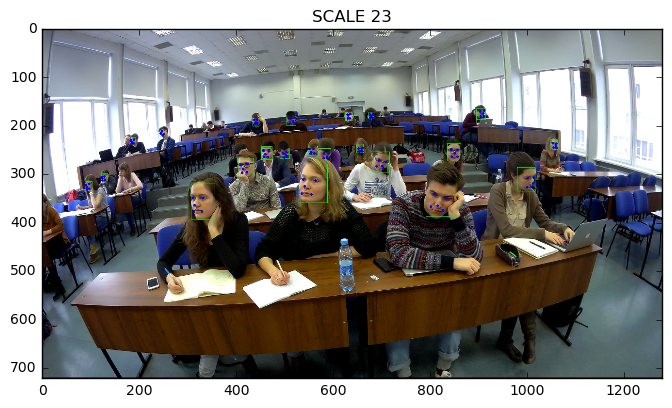

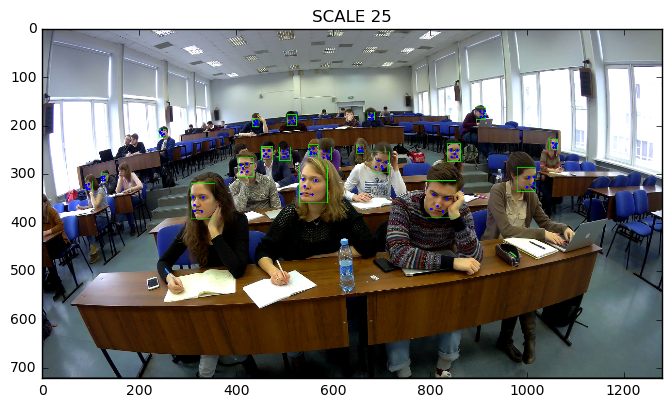

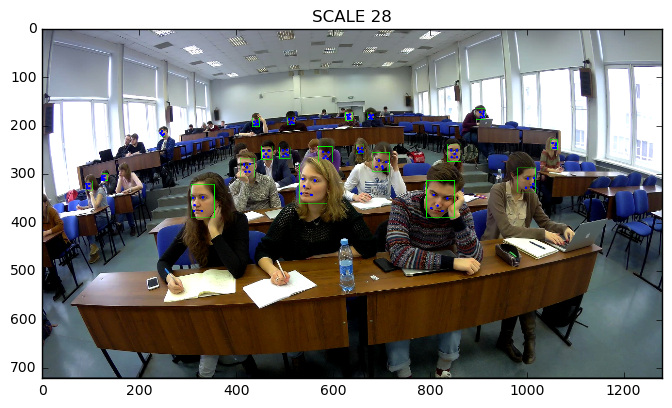

In [71]:
scales = [23, 25, 28]
vis(img_matlab, scales)

SCALE 20 	 time 3.24855995178
SCALE 30 	 time 1.22714495659
SCALE 40 	 time 0.62367105484
SCALE 60 	 time 0.159193992615


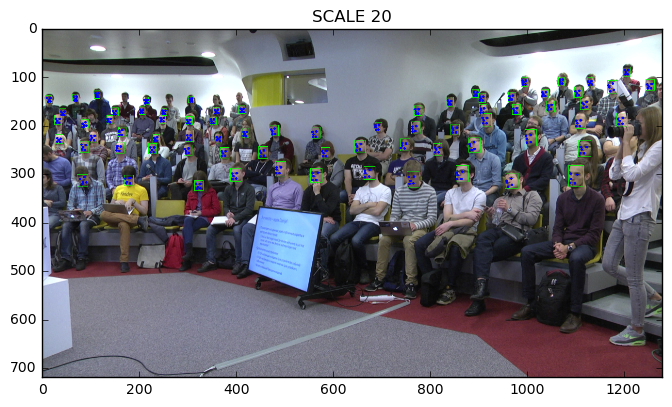

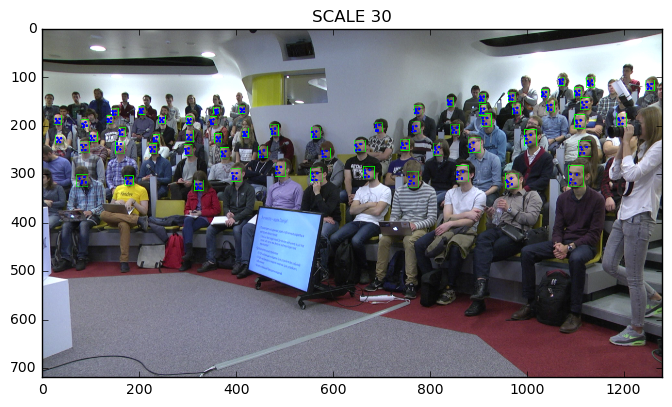

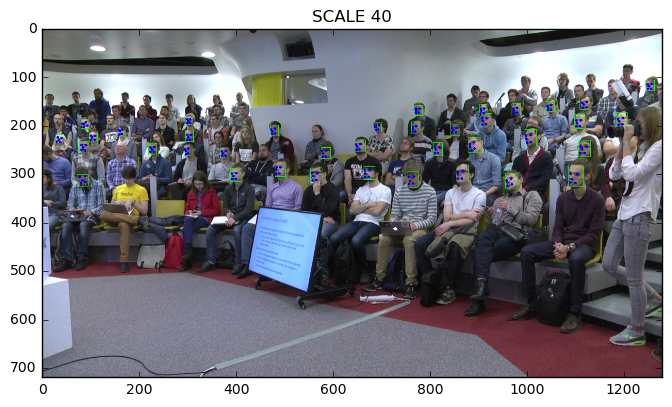

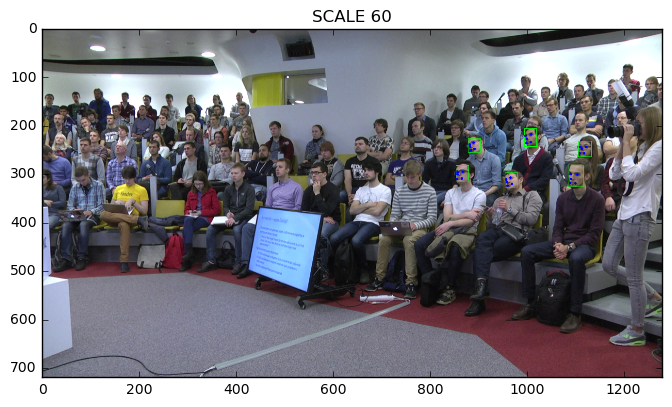

In [72]:
imgpath = "./mytest4.png"
img = cv2.imread(imgpath)
img_matlab = img.copy()
tmp = img_matlab[:,:,2].copy()
img_matlab[:,:,2] = img_matlab[:,:,0]
img_matlab[:,:,0] = tmp

scales = [20, 30, 40, 60]
vis(img_matlab, scales)